# Logistic regression

In this lab you will get some hands-on experience with one of the most popular classification methods: logistic regression. In the problem of binary classification, it can be used to predict the probability that an instance $\mathbf{x}_{i}$ belongs to a certain class (e.g. $+1$). 

## Exercise 1

In the first exercise we want you to implement a logistic regression classifier by yourself and compare this model to sklearn's implementation of logistic regression. First let's generate some data that is easily seperable.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
num_observations = 2000

x_class1 = np.random.multivariate_normal([0, 0], [[1, .25],[.25, 1]], num_observations)
x_class2 = np.random.multivariate_normal([1, 4], [[1, .25],[.25, 1]], num_observations)

# Training data:
X_train = np.vstack((x_class1, x_class2)).astype(np.float32)
y_train = np.hstack((np.zeros(num_observations), np.ones(num_observations))) # labels are 0, 1

If we plot the data, we see it is linearly seperable.

(4000,)

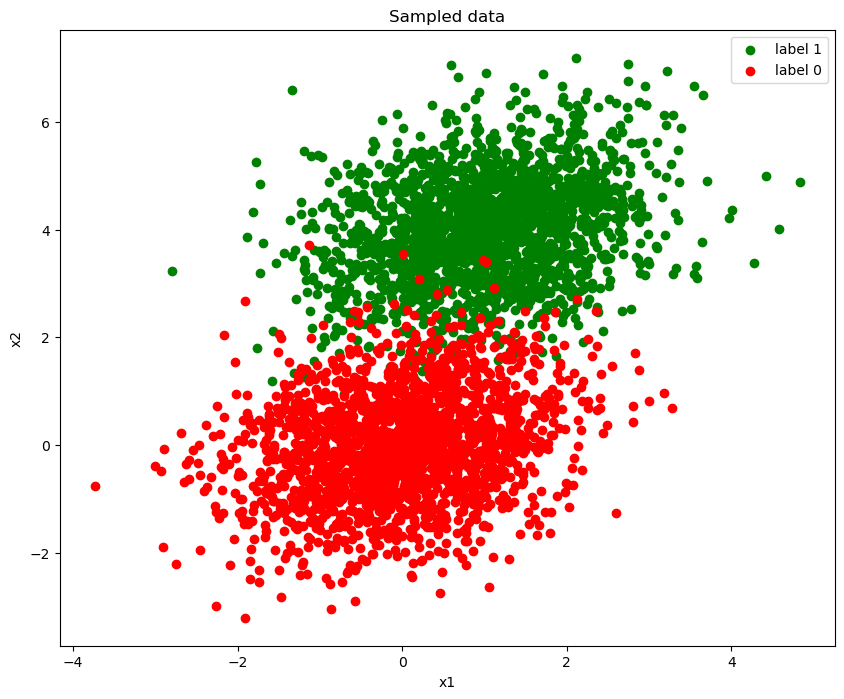

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='green', label='label 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='red', label='label 0')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title('Sampled data')
plt.legend()
y_train.shape

#### Gradient descent
Let ${\color{Dandelion}\bf{x} } \in {\color{Sienna}\mathbb{R}}^{d}$,  ${\color{Dandelion}y} \in \{0,1\}$ be some training example and ${\color{Sienna}\bf{X}} \in {\color{Sienna}\mathbb{R}}^{n\times d}$, ${\color{Dandelion}\bf{y}} \in {\color{Sienna}\mathbb{R}}^{n}$ be the training data set. In logistic regression the weights ${\color{Tomato}\bf{w}}$ of a simple linear model ${\color{Tomato}\bf{w}}^T{\color{Dandelion}\bf{x} }$ are learned by minimizing the negative log likelihood of the training data. The likelihood can be written as:

$${\color{Cornflowerblue}p}({\color{Dandelion}\bf{y}}|{\color{Sienna}\mathbf{X}}, {\color{Tomato}\bf{w}}) = \mathop{\color{Cornflowerblue}\prod}_{{\color{VioletRed}i}|{\color{Dandelion}y}_{\color{VioletRed}i} = 1} \frac{{\color{Cornflowerblue}\exp}({\color{Tomato}\bf{w}}^T{\color{Dandelion}\bf{x} }_{\color{VioletRed}i})}{1+{\color{Cornflowerblue}\exp}({\color{Tomato}\bf{w}}^T{\color{Dandelion}\bf{x} }_{\color{VioletRed}i})} \mathop{\color{Cornflowerblue}\prod}_{{\color{VioletRed}i}|{\color{Dandelion}y}_{\color{VioletRed}i} = 0} \frac{1}{1+{\color{Cornflowerblue}\exp}({\color{Tomato}\bf{w}}^T{\color{Dandelion}\bf{x} }_{\color{VioletRed}i})},$$

then we obtain the log likelihood 

$${\color{Cornflowerblue}\log} ({\color{Cornflowerblue}p}({\color{Dandelion}\bf{y}}|{\color{Sienna}\mathbf{X}}, {\color{Tomato}\bf{w}}) ) = \mathop{\color{Cornflowerblue}\sum}_{\color{VioletRed}i} {\color{Dandelion}y}_{\color{VioletRed}i} {\color{Tomato}\bf{w}}^T{\color{Dandelion}\bf{x} }_{\color{VioletRed}i} - {\color{Cornflowerblue}\log}(1 + {\color{Cornflowerblue}\exp}({\color{Tomato}\bf{w}}^T {\color{Dandelion}\bf{x} }_{\color{VioletRed}i}))$$

Since there is no analytic solution for this problem, we need to perform numeric optimization, e.g. gradient descent, in order to find the optimal weights 
$${\color{Tomato}\bf{w}}^* = {\color{Cornflowerblue}\arg \min}_{{\color{Tomato}\bf{w}}} - {\color{Cornflowerblue}\log} ({\color{Cornflowerblue}p}({\color{Dandelion}\bf{y}}|{\color{Sienna}\mathbf{X}}, {\color{Tomato}\bf{w}}))$$.  

Try to understand the following function `logistic_regression(X, y, num_steps, learning_rate, add_intercept)`.
A few functions are missing by now: `sigmoid()`, `neg_log_likelihood()`, `log_likelihood_gradient()`. These have to be implemented in the next sections.

- [X] `sigmoid()`
- [X] `neg_log_likelihood()`
- [X] `log_likelihood_gradient()`

#### `logistic_regression(X, y, num_steps, learning_rate, add_intercept)` 1.1

In [4]:
def logistic_regression(X, y, num_steps, learning_rate, add_intercept):
    # X: n x d matrix of instances
    # y: vector of n labels
    
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    weights = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(X, weights)
        predictions = sigmoid(scores)

        gradient = log_likelihood_gradient(X, y, weights)
        weights -= learning_rate * gradient
        
        if step % 10000 == 0:
            print (neg_log_likelihood(X, y, weights))
        
    return weights

#### `neg_log_likelihood(X, y, weights)` Negative Log likelihood 1.2

Write a function that calculates the **negative** log likelihood of the data.

Once again, the negative log likelihood is defined as: 
$$ -{\color{Cornflowerblue}\log} ({\color{Cornflowerblue}p}({\color{Dandelion}\bf{y}}|{\color{Sienna}\mathbf{X}}, {\color{Tomato}\bf{w}}) ) = -\left(\mathop{\color{Cornflowerblue}\sum}_{\color{VioletRed}i} {\color{Dandelion}y}_{\color{VioletRed}i} {\color{Tomato}\bf{w}}^T{\color{Dandelion}\bf{x} }_{\color{VioletRed}i} - {\color{Cornflowerblue}\log}(1 + {\color{Cornflowerblue}\exp}({\color{Tomato}\bf{w}}^T {\color{Dandelion}\bf{x} }_{\color{VioletRed}i}))\right) $$

In [5]:
def neg_log_likelihood(X, y, weights):
    ####################
    # INSERT CODE HERE #
    ####################
    logp = 0
    for i in range(len(y)):
        logp += y[i]*np.dot(X[i], weights) - np.log(1 + np.exp(np.dot(X[i], weights)))
    return -logp

In [1]:
#print(X_train[0])

#### `sigmoid(scores)` Sigmoid function 1.3

A logistic regression classifier predicts the probability that an instance ${\color{Dandelion}\bf{x}}$ belongs to a certain class ${\color{Dandelion}y}=1$, by ${\color{Cornflowerblue}p}({\color{Dandelion}y}=1| {\color{Dandelion}\bf{x}}, {\color{Tomato}\bf{w}}) = {\color{Cornflowerblue}\sigma}({\color{Dandelion}\bf{x}}^T{\color{Tomato}\bf{w}})$. It uses the sigmoid function ${\color{Cornflowerblue}\sigma}$ to map the outputs/scores of a linear model into probablities: $[-{\color{Cornflowerblue}\infty}, +{\color{Cornflowerblue}\infty}] \to [0,1]$.

$$ {\color{Cornflowerblue}\sigma}({\color{Dandelion}t}) = \frac{1}{1+{\color{Cornflowerblue}\exp}{(-{\color{Dandelion}t})}}$$

Please implement the sigmoid function, that accepts a vector of scores as input and returns a vector of probabilities.

In [6]:
def sigmoid(scores):
    ####################
    # INSERT CODE HERE #
    ####################
    sigma = np.zeros(len(scores) )
    for i in range(len(sigma) ):
        sigma[i]=1/(1+np.exp(-scores[i]))
    return sigma

####  `log_likelihood_gradient(X, y, weights)` Log likelihood gradient 1.4

Write a function that returns the gradient of the negative log likelihood. If we derive the negative log likelihood with respect to ${\color{Tomato}\bf{w}}$, we obtain the gradient as 

$$-{\color{Cornflowerblue}\nabla\log} ({\color{Cornflowerblue}p}({\color{Dandelion}\bf{y}}|{\color{Sienna}\mathbf{X}}, {\color{Tomato}\bf{w}}))  = -{\color{Cornflowerblue}\bf{g}} = -{\color{Sienna}\mathbf{X}}^T ({\color{Dandelion}\bf{y}} - {\color{Cornflowerblue}\sigma}({\color{Sienna}\mathbf{X}} {\color{Tomato}\bf{w}})).$$

In [7]:
def log_likelihood_gradient(X, y, weights):
    ####################
    # INSERT CODE HERE #
    ####################  
    return -np.dot( X.T, y - sigmoid(  np.dot(X, weights) ) ) 

#### `Code` test the functions
We now test your code:

In [8]:
from scipy.special import expit

try: 
    temp_value1 = neg_log_likelihood(X_train, y_train, [-10,12])

    intercept = np.ones((X_train.shape[0], 1))
    X_temp = np.hstack((intercept, X_train))
    temp_value2 = neg_log_likelihood(X_temp, y_train, [-6,4,-0.08])
    
    rounded_value1=np.ceil(temp_value1)
    rounded_value2=np.ceil(temp_value2)
    
    assert  rounded_value1 == 11012.0, "The log likelihood calculation;" + str(rounded_value1)+';'+str(11012.0)
    assert  rounded_value2 == 6559.0, "The log likelihood calculation;" + str(rounded_value2)+';'+str(6559.0)
    
    temp_value1 = sigmoid([0.25])
    temp_value2 = sigmoid([10])
    rounded_value1 = float("{:.4f}".format(temp_value1[0]))
    rounded_value2 = float("{:.4f}".format(temp_value2[0]))
    
    temp_value3 = expit([0.25])
    temp_valu42 = expit([10])
    rounded_value3 = float("{:.4f}".format(temp_value3[0]))
    rounded_value4 = float("{:.4f}".format(temp_valu42[0]))
    
    assert rounded_value1 == rounded_value3, "The sigmoid calculation;" + str(rounded_value1)+';'+str(rounded_value3)
    assert rounded_value2 == rounded_value4, "The sigmoid calculation;" + str(rounded_value2)+';'+str(rounded_value4)
    
    def help_rounder(array):
        for i in range(len(array)):
            array[i] = float("{:.4f}".format(array[i]))
        return array
    
    temp_value1 = log_likelihood_gradient(X_train,y_train,[20,10])
    rounded_value1 = help_rounder(temp_value1)
    temp_value2 = log_likelihood_gradient(X_train,y_train,[5,-10])
    rounded_value2 = help_rounder(temp_value2)
    intercept = np.ones((X_train.shape[0], 1))
    X_temp = np.hstack((intercept, X_train))
    temp_value5 = log_likelihood_gradient(X_temp,y_train,[-15,10,0.5])
    rounded_value5 = help_rounder(temp_value5)
    
    rounded_value3 = [721.0687,476.1421]
    rounded_value4 = [-1830.7943, -8656.9904]
    rounded_value6 = [-1086.3782,  -226.6353, -4527.7163]
    

    assert all(rounded_value1 == rounded_value3), "The log likelihood gradient calculation;" + str(rounded_value1)+';'+str(rounded_value3)
    assert all(rounded_value2 == rounded_value4), "The log likelihood gradient calculation;" + str(rounded_value2)+';'+str(rounded_value4)
    assert all(rounded_value5 == rounded_value6), "The log likelihood gradient calculation;" + str(rounded_value5)+';'+str(rounded_value6)    
    print ("The code seems fine.")
    
except AssertionError as err:
    parts=str(err).split(';')
    print ("Currently there is a fault in: ",parts[0])
    print("expected value:", parts[2], "instead got value:",parts[1])
    print("Note: Values are rounded")

The code seems fine.


#### `Code` Training weights with own code and sklearn 1.5 
We start by training the weights of the logistic regression model on the training data, using the function `logistic_regression()`. We select a reasonable value for the number of steps (e.g. `30000`) and learning rate (e.g. `5e-5`) and make use of the option to add an intercept to the data.

In [62]:
weights = logistic_regression(X_train, y_train, num_steps=30000, learning_rate=5e-5, add_intercept=True)

2123.180140065915
281.46522814195663
281.4211438048943


Now use the sklearn package `LogisticRegression` to train a logistic regression classifier clf on the same data and compare its weights to the weights of your model. 

> Note: sklearn uses L2 regularization by default, so you should turn it off to make results comparable.

#### `Code` Train wieghts with sklearn and compare results

In [65]:
from sklearn.linear_model import LogisticRegression

####################
# INSERT CODE HERE #
####################

clf = LogisticRegression(penalty=None).fit(X_train, y_train)

# Print weights of both models:
print (clf.intercept_, clf.coef_)  # sklearn's weights
print (weights)                    # your model's weights

[-7.28929134] [[-0.04385161  3.67418106]]
[-7.29283809 -0.04379176  3.675587  ]


#### `Code` Classification 1.6 

Calculate predictions for the training data (`X_train` with added intercept) using your logistic regression model (i.e. calculate the scores of the linear model and map it to probabilities using the sigmoid function) and compare your results to sklearn's accuracy.

In [66]:
data_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)),X_train))

####################
# INSERT CODE HERE #
####################
preds = clf.predict(X_train)

# Compare results:
print ('Your accuracy: {0}'.format((preds == y_train).sum().astype(float) / len(preds)))
print ('Sklearn\'s accuracy: {0}'.format(clf.score(X_train, y_train)))

Your accuracy: 0.973
Sklearn's accuracy: 0.973


## Exercise 2

Now we consider another dataset which consists of 22 features, each containing a test result for microchips. The target variable is whether the chip is `defect` or `not defect`. 

#### `Code` Preamble and loading dataset
First we load the dataset into a dataframe. We will only consider the first two features `test1` and `test2`. 

In [13]:
from __future__ import division
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Loading the dataset
data = pd.read_csv('data_chiptests.txt',header=None, names = ('test1','test2','released'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


#### `Code` Plotting data

(118,)

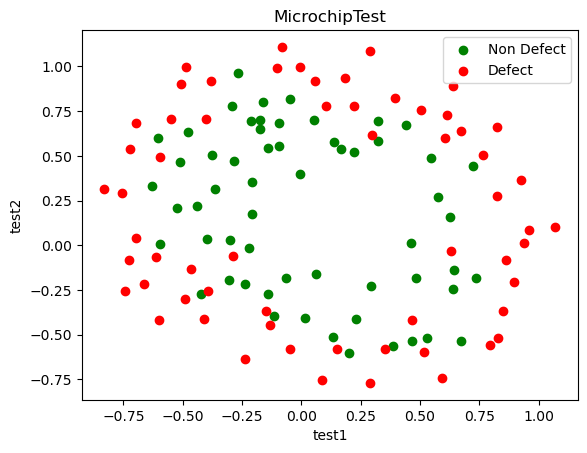

In [14]:
X = data.iloc[:,:2].values        # instances
y = 2 * data.iloc[:,2].values-1   # labels

# Plot the data 
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Non Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("test1")
plt.ylabel("test2")
plt.title('MicrochipTest')
plt.legend()
y.shape

#### Exercise 2.1 (sklearn)

Use the sklearn package `LogisticRegression` again to implement a simple logistic regression classifier `clf`. Consider the cases, where the regularization parameter is chosen to be: ${\color{Tomato}C}=0.01; {\color{Tomato}C}=0.1; {\color{Tomato}C}=1; {\color{Tomato}C}=100$. In each case compute the accuracy on the training sample. What do you observe?

In [34]:
####################
# INSERT CODE HERE #
####################
from sklearn.linear_model import LogisticRegression

for i in [0.001, 0.01, 0.1, 1,10,  100, 1000]:
    clf = LogisticRegression(C=i)
    clf.fit(X, y)
    preds = clf.predict(X)
    print ('Sklearn\'s accuracy: {0}'.format(clf.score(X, y)))

Sklearn's accuracy: 0.5084745762711864
Sklearn's accuracy: 0.5084745762711864
Sklearn's accuracy: 0.4745762711864407
Sklearn's accuracy: 0.5423728813559322
Sklearn's accuracy: 0.5423728813559322
Sklearn's accuracy: 0.5423728813559322
Sklearn's accuracy: 0.5423728813559322


We use a function `plot_boundary` to plot the decision boundary of the trained model with the best training accuracy.

In [131]:
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    # clf: trained model
    # X: instances
    # y: labels
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step))
    
    if poly_featurizer == None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, cmap = plt.cm.Paired)

If everything went well, we can now have a look at the decision boundary of the trained model together with the data. What do you observe?

accuracy: 0.542


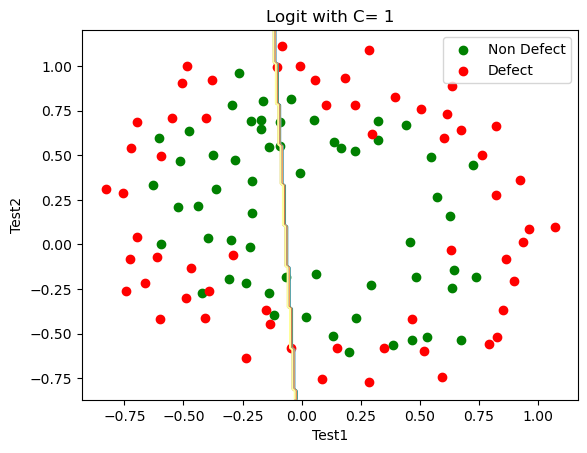

In [128]:
BestC=1 #Modify
clf = LogisticRegression(C=BestC, n_jobs=-1,)
clf.fit(X, y)

plot_boundary(clf, X, y, grid_step=.01)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Non Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.title('Logit with C= {}'.format(BestC))
plt.legend();

print("accuracy:", round(clf.score(X, y), 3))

#### Exercise 2.2 (Polynomial features)

As you have seen the performance of simple logistic regression for linearly not separable data is quite poor. Polynomial features for 2-dimensional vector $x = (x_{1},x_{2})$ of dimension $r$ would be the set of features: 
$$\{x_{1}^{i}x_{2}^{j}\}_{i+j\leq r, 0 \leq i,j \leq r}.$$

For example for $r=2$ the polynomial features for $x=\{x_{1},x_{2}\}$ would be: 
$$\{1,x_{1},x_{2},x_{1}x_{2},x_{1}^{2},x_{2}^{2}\}$$

Compute polynomial features of degree $r=5$. Use the sklearn package `PolynomialFeatures` to produce polynomial features for the instances $\mathbb{X}$ 

> Hint: method `fit_transform` will be useful

In [121]:
from sklearn.preprocessing import PolynomialFeatures

####################
# INSERT CODE HERE #
####################

poly = PolynomialFeatures(5)

X_poly= poly.fit_transform(X)

#print(X_poly)

#### Exercise 2.3

Now train a logistic regression model `clf_2` using the polynomial features.

In [132]:
####################
# INSERT CODE HERE #
####################

# C =
# clf_2 = #Note: use the variable C
C=1
clf_2 = LogisticRegression(C=C, multi_class='ovr')
clf_2.fit(X_poly, y)
preds = clf_2.predict(X_poly)
print ('Sklearn\'s accuracy: {0}'.format(clf_2.score(X_poly, y)))

Sklearn's accuracy: 0.8389830508474576


Let's evaluate and plot the decision boundary again. What do you observe?

Prediction Score: 0.839


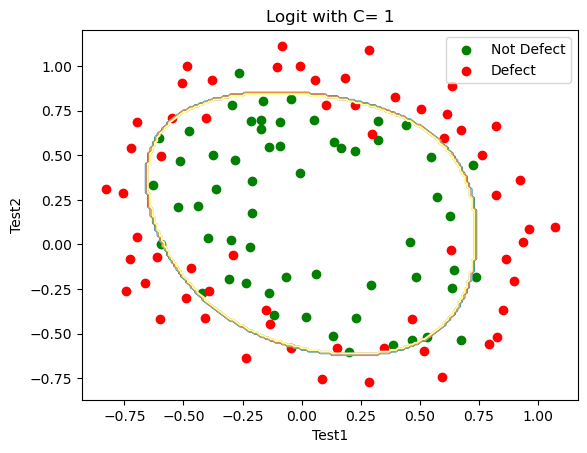

In [130]:
#poly_plot_boundary(clf_2, X, y, poly, grid_step=.01)
plot_boundary(clf_2, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Not Defect')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Defect')
plt.xlabel("Test1")
plt.ylabel("Test2")
plt.title('Logit with C= {}'.format(C))
plt.legend();

print("Prediction Score:", 
round(clf_2.score(X_poly, y), 3))